### 1.라이브러리 불러오기


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns


from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics 
from sklearn.feature_selection import SelectFromModel, RFECV

### 2. 데이터 불러오기 및 데이터 확인(매장 데이터, 매장 메타 데이터)

In [2]:
df=pd.read_csv("train.csv")

D:\jpyt\.venv\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_store=pd.read_csv("store.csv")
df_store = df_store.fillna(0)
df = df.fillna(0)
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [4]:
print(df.isnull().sum())
print(df_store.isnull().sum())
print(df.info() )

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1

In [5]:
df_test=pd.read_csv("test.csv")
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [6]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [8]:
df_store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [9]:
df['StateHoliday']
df['StateHoliday']=df['StateHoliday'].replace('a',1)
df['StateHoliday']=df['StateHoliday'].replace('b',2)
df['StateHoliday']=df['StateHoliday'].replace('c',3)
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,1,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1
1017206,1113,2,2013-01-01,0,0,0,0,1,1
1017207,1114,2,2013-01-01,0,0,0,0,1,1
1017208,1115,2,2013-01-01,0,0,0,0,1,1


In [10]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [11]:
df['StateHoliday']=df['StateHoliday'].apply(pd.to_numeric)
print(df.dtypes)
df.tail()

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday      int64
SchoolHoliday     int64
dtype: object


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,1,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1
1017206,1113,2,2013-01-01,0,0,0,0,1,1
1017207,1114,2,2013-01-01,0,0,0,0,1,1
1017208,1115,2,2013-01-01,0,0,0,0,1,1


In [12]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,4.516279e-02,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,2.836559e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00


In [13]:
df.shape

(1017209, 9)

In [14]:
df=df[:379435]
print(df.head())
print(df.shape)
print(df.tail())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1             0   
1      2          5  2015-07-31   6064        625     1      1             0   
2      3          5  2015-07-31   8314        821     1      1             0   
3      4          5  2015-07-31  13995       1498     1      1             0   
4      5          5  2015-07-31   4822        559     1      1             0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
(379435, 9)
        Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
379430   1111          5  2014-08-01   5199        442     1      1   
379431   1112          5  2014-08-01  10058        821     1      1   
379432   1113          5  2014-08-01   7618        723     1      1   
379433   1114          5  2014-08-01  22827       3748     1      1   
379434   1115          5  2014-08-01  

In [16]:
#groupby를 이용해 같은 스토어에 대한 평균값 계산
df_mean=df.groupby('Store').mean()
df_store = pd.merge(df_store,df_mean, how='inner',on='Store')


In [17]:
df_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [18]:
corr = df.corr()
corr

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,1.000000,-0.000004,0.002463,0.022847,0.000257,-0.000009,0.000579,0.001904
DayOfWeek,-0.000004,1.000000,-0.481223,-0.399984,-0.547357,-0.405042,-0.012387,-0.207914
Sales,0.002463,-0.481223,1.000000,0.891396,0.684605,0.453943,-0.226614,0.092340
Customers,0.022847,-0.399984,0.891396,1.000000,0.618453,0.315743,-0.200695,0.076573
Open,0.000257,-0.547357,0.684605,0.618453,1.000000,0.306120,-0.334754,0.096285
Promo,-0.000009,-0.405042,0.453943,0.315743,0.306120,1.000000,-0.027850,0.080234
StateHoliday,0.000579,-0.012387,-0.226614,-0.200695,-0.334754,-0.027850,1.000000,0.185945
SchoolHoliday,0.001904,-0.207914,0.092340,0.076573,0.096285,0.080234,0.185945,1.000000


<AxesSubplot:>

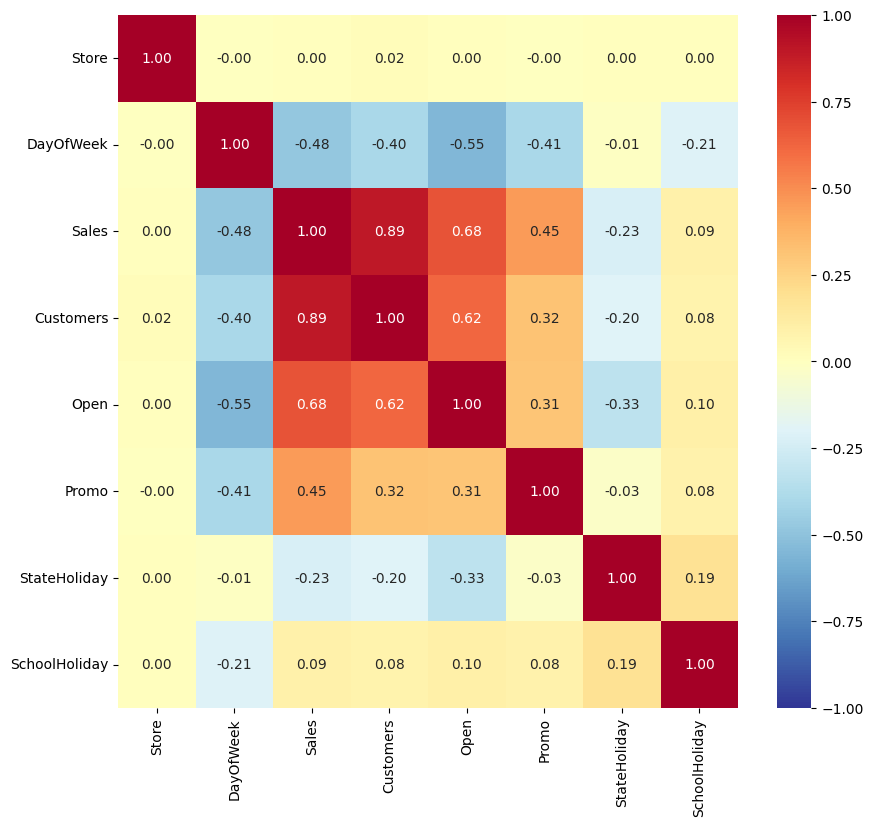

In [19]:
fig, ax = plt.subplots( figsize=(10,9) )
sns.heatmap(corr, 
            
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
            fmt='.2f'
              )

In [21]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4.00274,3880.775342,453.326027,0.830137,0.4,0.043836,0.230137
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",4.00274,4212.372603,484.695890,0.832877,0.4,0.041096,0.197260
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",4.00274,5741.041096,611.147945,0.827397,0.4,0.046575,0.194521
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,4.00274,8323.953425,1114.953425,0.832877,0.4,0.041096,0.178082
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,4.00274,3919.868493,442.750685,0.827397,0.4,0.049315,0.202740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",4.00274,4082.389041,344.358904,0.827397,0.4,0.046575,0.194521
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,4.00274,7617.778082,638.504110,0.827397,0.4,0.046575,0.194521
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0,4.00274,5690.246575,594.923288,0.832877,0.4,0.041096,0.169863
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0,4.00274,17845.736986,2684.405479,0.832877,0.4,0.041096,0.172603


In [22]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
379430,1111,5,2014-08-01,5199,442,1,1,0,1
379431,1112,5,2014-08-01,10058,821,1,1,0,1
379432,1113,5,2014-08-01,7618,723,1,1,0,1
379433,1114,5,2014-08-01,22827,3748,1,1,0,1


In [24]:
df = pd.merge(df,df_store,on='Store')

In [26]:
df['Date']=pd.to_datetime(df['Date'])
type(df['Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['Week']=df['Date'].dt.week

D:\jpyt\.venv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


https://blog.naver.com/PostView.naver?blogId=nilsine11202&logNo=221667433984&redirect=Dlog&widgetTypeCall=true&directAccess=false

In [28]:
df=df[df.Open_x == 1]

In [29]:
df=df.drop(['Open_x','Date'],axis=1)

In [30]:
#데이터 타입 확인
df.dtypes

Store                          int64
DayOfWeek_x                    int64
Sales_x                        int64
Customers_x                    int64
Promo_x                        int64
StateHoliday_x                 int64
SchoolHoliday_x                int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
DayOfWeek_y                  float64
Sales_y                      float64
Customers_y                  float64
Open_y                       float64
Promo_y                      float64
StateHoliday_y               float64
SchoolHoliday_y              float64
Year                           int64
Month                          int64
Day                            int64
Week                           int64
d

In [31]:
#숫자형이 아닌 열의 유니크 값 확인 
df[
    'PromoInterval'
].value_counts()

0                   162753
Jan,Apr,Jul,Oct      85805
Feb,May,Aug,Nov      36571
Mar,Jun,Sept,Dec     30423
Name: PromoInterval, dtype: int64

In [32]:
df['StoreType']
df['StoreType']=df['StoreType'].replace('a',0)
df['StoreType']=df['StoreType'].replace('b',1)
df['StoreType']=df['StoreType'].replace('c',2)
df['StoreType']=df['StoreType'].replace('d',3)

In [33]:
df['Assortment']
df['Assortment']=df['Assortment'].replace('a',0)
df['Assortment']=df['Assortment'].replace('b',1)
df['Assortment']=df['Assortment'].replace('c',2)


In [34]:
df=df.drop('PromoInterval',axis=1)

In [35]:
df=df.dropna(axis=0)
print(df.isnull().sum())

Store                        0
DayOfWeek_x                  0
Sales_x                      0
Customers_x                  0
Promo_x                      0
StateHoliday_x               0
SchoolHoliday_x              0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
DayOfWeek_y                  0
Sales_y                      0
Customers_y                  0
Open_y                       0
Promo_y                      0
StateHoliday_y               0
SchoolHoliday_y              0
Year                         0
Month                        0
Day                          0
Week                         0
dtype: int64


In [36]:
X=df.drop('Sales_x',axis=1)
y=df['Sales_x']
X=X.drop('Sales_y',axis=1)
X=X.drop('Customers_x',axis=1)
X=X.drop('Customers_y',axis=1)

In [37]:
X.columns

Index(['Store', 'DayOfWeek_x', 'Promo_x', 'StateHoliday_x', 'SchoolHoliday_x',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'DayOfWeek_y', 'Open_y',
       'Promo_y', 'StateHoliday_y', 'SchoolHoliday_y', 'Year', 'Month', 'Day',
       'Week'],
      dtype='object')

### 3.모델링 및 평가

In [38]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

In [39]:
def get_regression_metrics(model, actual, predicted):
    

    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }

    # reg_metrics 반환
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [40]:
def plot_features_weights(model, weights, feature_names, weights_type='c'):
    

    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(px,py))
    label = ' Coefficients' if weights_type =='c' else ' Features Importance'
    plt.xlabel(model + label)
    plt.gca().legend_ = None


In [41]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

In [42]:

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics 
from sklearn.feature_selection import SelectFromModel, RFECV

linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_test_predict)
linreg_metrics

R^2 training: 0.209, R^2 test: 0.211


,Linear Regression
Root Mean Squared Error,2776.999832
Mean Absolute Error,2028.063438
R^2,0.211175
Explained Variance,0.211176


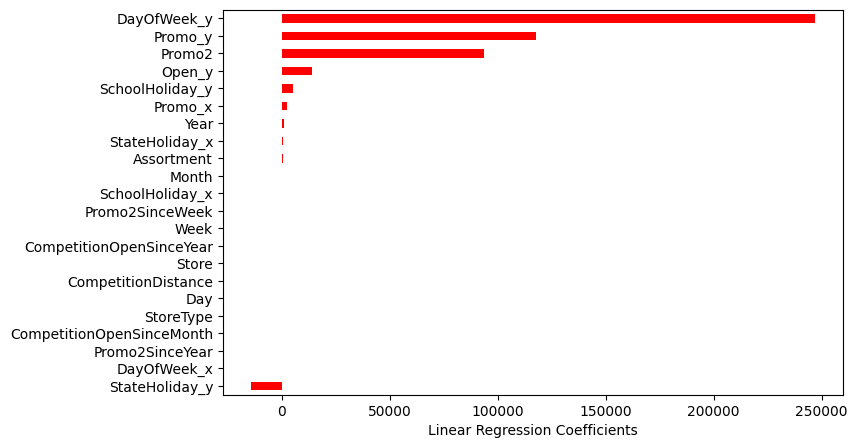

In [43]:
plot_features_weights('Linear Regression', linreg.coef_, X_train.columns, 'c')

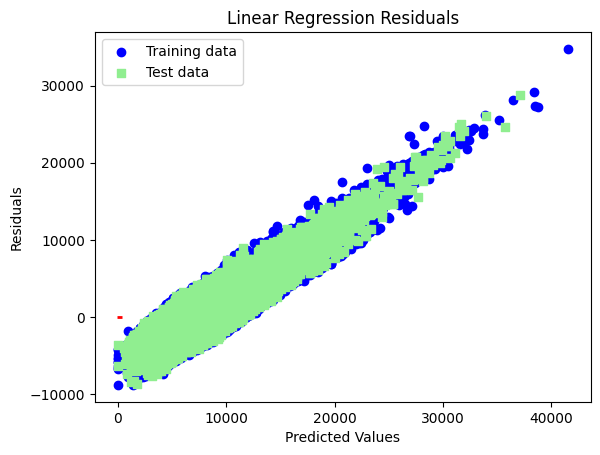

In [44]:
plot_residual('Linear Regression', y_train_predict, y_train, y_test_predict, y_test)

In [45]:
lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_test_predict = lasso.predict(X_test)
y_train_predict = lasso.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

lasso_metrics = get_regression_metrics('LASSO', y_test, y_test_predict)

lasso_metrics

R^2 training: 0.208, R^2 test: 0.211


D:\jpyt\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.729e+11, tolerance: 2.465e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


,LASSO
Root Mean Squared Error,2777.264678
Mean Absolute Error,2028.648962
R^2,0.211025
Explained Variance,0.211026


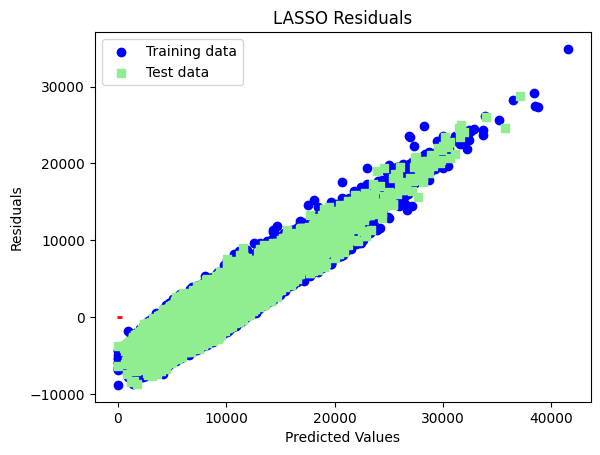

In [46]:
plot_residual('LASSO', y_train_predict, y_train, y_test_predict, y_test)

In [47]:
#try ridge

rdg = linear_model.Ridge(alpha=0.01)
rdg.fit(X_train, y_train)

y_test_predict = rdg.predict(X_test)
y_train_predict = rdg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rdg_metrics = get_regression_metrics('Ridge Regression', y_test, y_test_predict)
rdg_metrics

R^2 training: 0.209, R^2 test: 0.211


,Ridge Regression
Root Mean Squared Error,2777.099867
Mean Absolute Error,2028.070562
R^2,0.211119
Explained Variance,0.211119


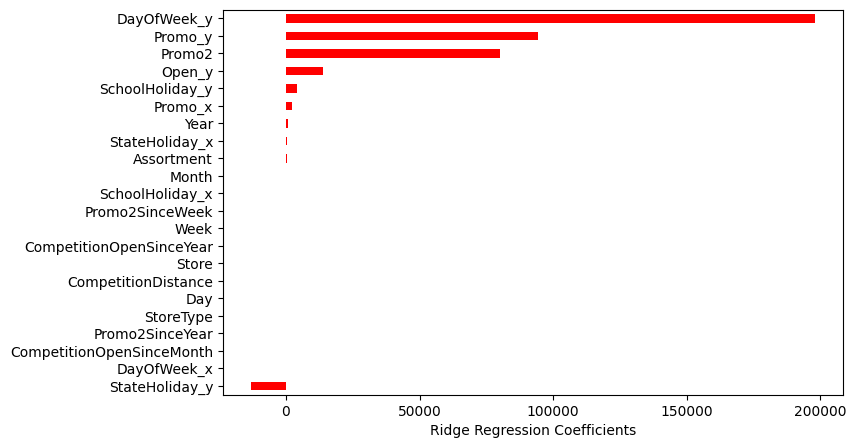

In [48]:
plot_features_weights('Ridge Regression', rdg.coef_, X_train.columns, 'c')

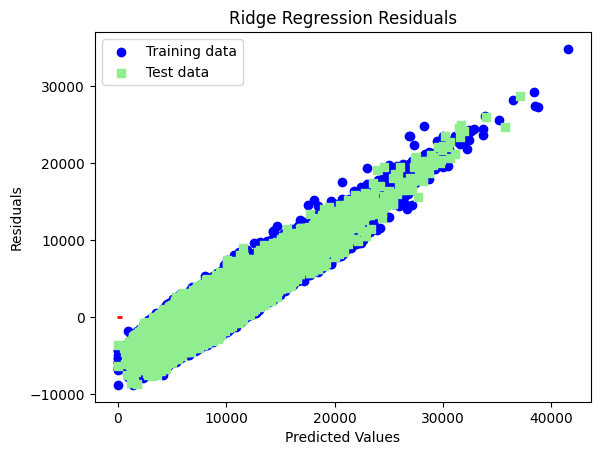

In [49]:
plot_residual('Ridge Regression', y_train_predict, y_train, y_test_predict, y_test)

In [65]:
#try Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_test_predict = polyreg.predict(X_test_poly)
y_train_predict = polyreg.predict(X_train_poly)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

polyreg_metrics = get_regression_metrics('Polynomial Regression', y_test, y_test_predict)
polyreg_metrics

R^2 training: 0.327, R^2 test: 0.323


,Polynomial Regression
Root Mean Squared Error,2571.853202
Mean Absolute Error,1886.293225
R^2,0.323417
Explained Variance,0.323431


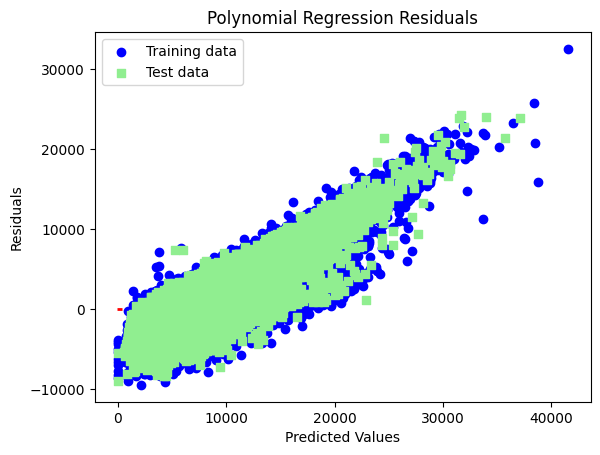

In [51]:
plot_residual('Polynomial Regression', y_train_predict, y_train, y_test_predict, y_test)

In [62]:
rf = RandomForestRegressor() # original features

rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

rf_metrics = get_regression_metrics('Random Forest Regression', y_test, y_test_predict)
rf_metrics

R^2 training: 0.987, R^2 test: 0.911


,Random Forest Regression
Root Mean Squared Error,931.254594
Mean Absolute Error,594.523056
R^2,0.911291
Explained Variance,0.911296


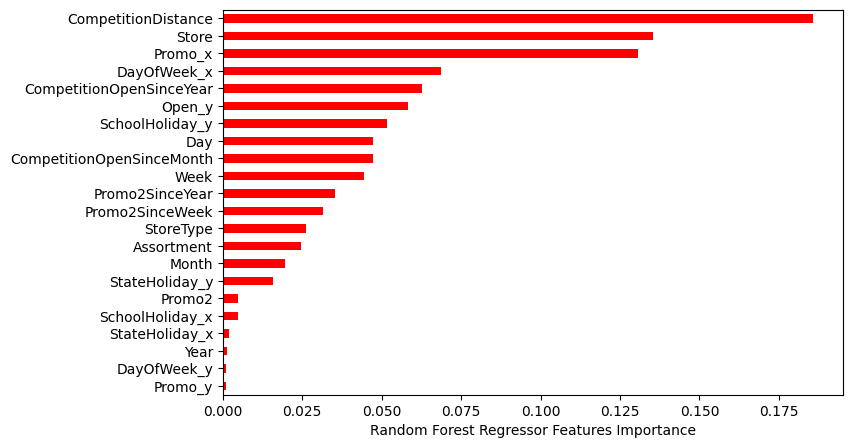

In [63]:
plot_features_weights('Random Forest Regressor', rf.feature_importances_, X_train.columns, 't' )

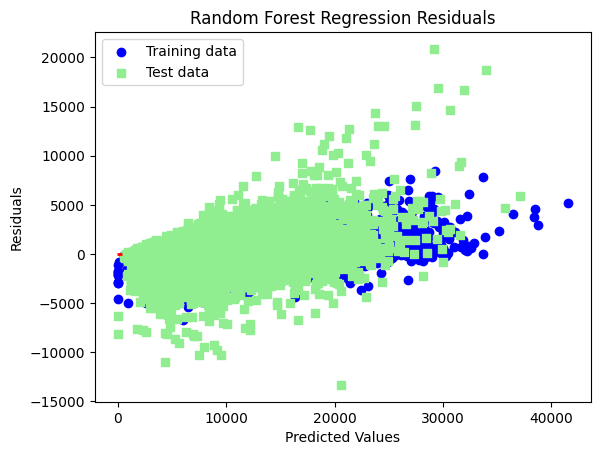

In [64]:
plot_residual('Random Forest Regression', y_train_predict, y_train, y_test_predict, y_test)

In [66]:
#regression metrics comparison before feature engineering

reg_metrics_bfe = pd.concat([linreg_metrics, lasso_metrics,polyreg_metrics, rdg_metrics, rf_metrics], axis=1)
reg_metrics_bfe

,Linear Regression,LASSO,Polynomial Regression,Ridge Regression,Random Forest Regression
Root Mean Squared Error,2776.999832,2777.264678,2571.853202,2777.099867,931.254594
Mean Absolute Error,2028.063438,2028.648962,1886.293225,2028.070562,594.523056
R^2,0.211175,0.211025,0.323417,0.211119,0.911291
Explained Variance,0.211176,0.211026,0.323431,0.211119,0.911296


### 4. 예측 결과 도출

In [67]:
df_test=pd.read_csv("test.csv")

In [68]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [69]:
df_test=df_test.fillna(0)
df_test.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [70]:
df_test=df_test.drop('Id',axis=1)

In [73]:
df_test['Date']=pd.to_datetime(df_test['Date'])


In [74]:
df_test['Year']=df_test['Date'].dt.year
df_test['Month']=df_test['Date'].dt.month
df_test['Day']=df_test['Date'].dt.day
df_test['Week']=df_test['Date'].dt.week

D:\jpyt\.venv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [75]:
df_test=df_test.drop('Date',axis=1)

In [76]:
print(X.columns)
print(len(X.columns))

Index(['Store', 'DayOfWeek_x', 'Promo_x', 'StateHoliday_x', 'SchoolHoliday_x',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'DayOfWeek_y', 'Open_y',
       'Promo_y', 'StateHoliday_y', 'SchoolHoliday_y', 'Year', 'Month', 'Day',
       'Week'],
      dtype='object')
22


In [77]:
df_test = pd.merge(df_test,df_store, how='inner',on='Store')

In [78]:
df_test=df_test.drop('Open_x',axis=1)
df_test=df_test.drop('PromoInterval',axis=1)
df_test=df_test.drop('Sales',axis=1)
df_test=df_test.drop('Customers',axis=1)

In [79]:
df_test['StoreType']
df_test['StoreType']=df_test['StoreType'].replace('a',0)
df_test['StoreType']=df_test['StoreType'].replace('b',1)
df_test['StoreType']=df_test['StoreType'].replace('c',2)
df_test['StoreType']=df_test['StoreType'].replace('d',3)

In [80]:
df_test['Assortment']
df_test['Assortment']=df_test['Assortment'].replace('a',0)
df_test['Assortment']=df_test['Assortment'].replace('b',1)
df_test['Assortment']=df_test['Assortment'].replace('c',2)

In [81]:
df_test['StateHoliday_x']
df_test['StateHoliday_x']=df_test['StateHoliday_x'].replace('a',1)
df_test['StateHoliday_x']=df_test['StateHoliday_x'].replace('b',2)
df_test['StateHoliday_x']=df_test['StateHoliday_x'].replace('c',3)
df_test['StateHoliday_x']=df_test['StateHoliday_x'].apply(pd.to_numeric)
print(df_test.dtypes)
df_test.tail()

Store                          int64
DayOfWeek_x                    int64
Promo_x                        int64
StateHoliday_x                 int64
SchoolHoliday_x                int64
Year                           int64
Month                          int64
Day                            int64
Week                           int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
DayOfWeek_y                  float64
Open_y                       float64
Promo_y                      float64
StateHoliday_y               float64
SchoolHoliday_y              float64
dtype: object


,Store,DayOfWeek_x,Promo_x,StateHoliday_x,SchoolHoliday_x,Year,Month,Day,Week,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek_y,Open_y,Promo_y,StateHoliday_y,SchoolHoliday_y
41083,1115,3,1,0,1,2015,8,5,32,3,...,0.0,0.0,1,22.0,2012.0,4.00274,0.830137,0.4,0.043836,0.230137
41084,1115,2,1,0,1,2015,8,4,32,3,...,0.0,0.0,1,22.0,2012.0,4.00274,0.830137,0.4,0.043836,0.230137
41085,1115,1,1,0,1,2015,8,3,32,3,...,0.0,0.0,1,22.0,2012.0,4.00274,0.830137,0.4,0.043836,0.230137
41086,1115,7,0,0,1,2015,8,2,31,3,...,0.0,0.0,1,22.0,2012.0,4.00274,0.830137,0.4,0.043836,0.230137
41087,1115,6,0,0,1,2015,8,1,31,3,...,0.0,0.0,1,22.0,2012.0,4.00274,0.830137,0.4,0.043836,0.230137


In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      41088 non-null  int64  
 1   DayOfWeek_x                41088 non-null  int64  
 2   Promo_x                    41088 non-null  int64  
 3   StateHoliday_x             41088 non-null  int64  
 4   SchoolHoliday_x            41088 non-null  int64  
 5   Year                       41088 non-null  int64  
 6   Month                      41088 non-null  int64  
 7   Day                        41088 non-null  int64  
 8   Week                       41088 non-null  int64  
 9   StoreType                  41088 non-null  int64  
 10  Assortment                 41088 non-null  int64  
 11  CompetitionDistance        41088 non-null  float64
 12  CompetitionOpenSinceMonth  41088 non-null  float64
 13  CompetitionOpenSinceYear   41088 non-null  flo

In [83]:
print(df_test.columns)
print(len(df_test.columns))

Index(['Store', 'DayOfWeek_x', 'Promo_x', 'StateHoliday_x', 'SchoolHoliday_x',
       'Year', 'Month', 'Day', 'Week', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'DayOfWeek_y', 'Open_y', 'Promo_y', 'StateHoliday_y',
       'SchoolHoliday_y'],
      dtype='object')
22


In [84]:
pred=rf.predict(df_test)

D:\jpyt\.venv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [85]:
pred

array([16650.07, 16959.56, 17272.42, ..., 13391.26, 18094.55, 13566.95])

In [86]:
predict = pd.read_csv('test.csv')

In [87]:
predict

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [88]:
predict['Sales'] = pd.DataFrame(pred)
predict

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,1,1,4,2015-09-17,1.0,1,0,0,16650.07
1,2,3,4,2015-09-17,1.0,1,0,0,16959.56
2,3,7,4,2015-09-17,1.0,1,0,0,17272.42
3,4,8,4,2015-09-17,1.0,1,0,0,14766.62
4,5,9,4,2015-09-17,1.0,1,0,0,17922.14
...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,14715.45
41084,41085,1112,6,2015-08-01,1.0,0,0,0,14921.67
41085,41086,1113,6,2015-08-01,1.0,0,0,0,13391.26
41086,41087,1114,6,2015-08-01,1.0,0,0,0,18094.55


In [89]:
Submission = predict[['Id','Sales']]


In [90]:
Submission.to_csv('Submission_김혜정.csv', index=False)